In [1]:
import numpy as np
import matplotlib.pyplot as plt
import response_functions as rf

In [2]:
gr = rf.Massless_Dirac_Fermions_B(
    hv=0.658,
    k=26,
    density=-0.01,
    temperature=0.001,
    magnetic_field=10,
    degeneracy=4,
    eta=0.001,
    N_cutoff=70,
)
gr0 = rf.Massless_Dirac_Fermions(
    hv=gr.hv, density=gr.density, temperature=gr.temperature, degeneracy=gr.degeneracy
)

In [3]:
dir(gr)

['N_cutoff',
 '_G',
 '_X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chemical_potential',
 '_cyclotron_frequency',
 '_degeneracy',
 '_density',
 '_dimension',
 '_el',
 '_filling_factor',
 '_hv',
 '_jxqjxq',
 '_jxqjyq',
 '_k',
 '_laguerre',
 '_lb',
 '_magnetic_field',
 '_nl',
 '_nqnq',
 '_temperature',
 'chemical_potential',
 'compute_chemical_potential',
 'compute_cyclotron_frequency',
 'compute_density',
 'compute_filling_factor',
 'compute_ll_degeneracy',
 'compute_ll_energy',
 'compute_magnetic_length',
 'conductivity',
 'cyclotron_frequency',
 'degeneracy',
 'density',
 'dimension',
 'dos',
 'drude_conductivity',
 'drude_hall_conductivity',

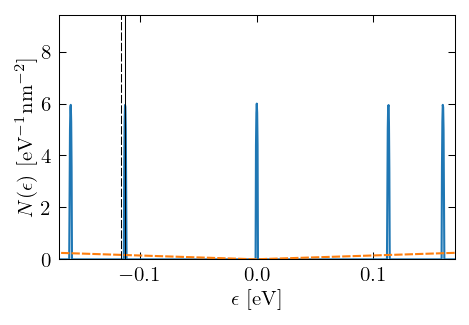

In [4]:
energy = np.linspace(-1.5 * gr.chemical_potential, 1.5 * gr.chemical_potential, 1001)
plt.plot(energy, gr.dos(energy))
plt.plot(energy, gr0.dos(energy), "--")
plt.vlines(
    gr.chemical_potential,
    ymin=0,
    ymax=gr.degeneracy * gr.nl / gr.eta,
    colors="k",
    lw=0.5,
)
plt.vlines(
    gr0.chemical_potential,
    ymin=0,
    ymax=gr.degeneracy * gr.nl / gr.eta,
    colors="k",
    lw=0.5,
    dashes="--",
)
plt.xlabel(r"$\epsilon ~[{\rm eV}]$")
plt.ylabel(r"$N(\epsilon) ~[{\rm eV^{-1}nm^{-2}}]$");

Text(0, 0.5, '$n ~[{\\rm nm^{-2}}]$')

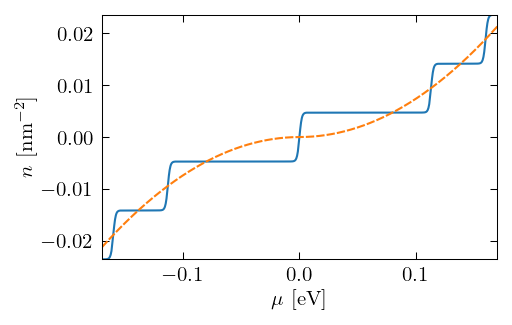

In [5]:
plt.plot(
    energy, [gr.compute_density(e, gr.temperature, gr.magnetic_field) for e in energy]
)
plt.plot(energy, [gr0.compute_density(e, gr0.temperature) for e in energy], "--")
plt.xlabel(r"$\mu ~[{\rm eV}]$")
plt.ylabel(r"$n ~[{\rm nm^{-2}}]$")

In [6]:
if False:
    omega = np.linspace(-3 * gr.chemical_potential, 3 * gr.chemical_potential, 1001)
    sigma = gr.conductivity(omega)
    sigmaH = gr.hall_conductivity(omega)
    if gr.temperature == 0:
        sigmaD = gr.drude_conductivity(omega)
        sigmaHD = gr.drude_hall_conductivity(omega)
    sigma0 = gr0.conductivity(omega, gamma=gr.eta)

    plt.figure(1)
    plt.plot(omega, sigma.real)
    if gr.temperature == 0:
        plt.plot(omega, sigmaD.real)
    plt.plot(omega, sigma0.real, "--")
    plt.hlines(np.pi / 4.0, xmin=0, xmax=np.max(omega), colors="k", dashes="--")
    plt.vlines(
        gr.cyclotron_frequency, ymin=0, ymax=2 * np.max(sigmaD.real), colors="k", lw=0.5
    )
    plt.xlabel(r"$\hbar\omega ~[{\rm eV}]$")
    plt.ylabel(r"$\Re[\sigma]/G_0$")

    plt.figure(2)
    plt.plot(omega, sigma.imag)
    if gr.temperature == 0:
        plt.plot(omega, sigmaD.imag)
    plt.plot(omega, sigma0.imag, "--")

    plt.vlines(
        gr.cyclotron_frequency, ymin=0, ymax=2 * np.max(sigmaD.real), colors="k", lw=0.5
    )
    plt.xlabel(r"$\hbar\omega ~[{\rm eV}]$")
    plt.ylabel(r"$\Im[\sigma]/G_0$")

    plt.figure(3)
    plt.plot(omega, sigmaH.imag)
    if gr.temperature == 0:
        plt.plot(omega, sigmaHD.imag)
    plt.vlines(
        gr.cyclotron_frequency,
        ymin=0,
        ymax=2 * np.max(sigmaHD.imag),
        colors="k",
        lw=0.5,
    )
    plt.xlabel(r"$\hbar\omega ~[{\rm eV}]$")
    plt.ylabel(r"$\Im[\sigma_{\rm H}]/G_0$")

    plt.figure(4)
    plt.plot(omega, sigmaH.real)
    if gr.temperature == 0:
        plt.plot(omega, sigmaHD.real)
    plt.vlines(
        gr.cyclotron_frequency,
        ymin=0,
        ymax=2 * np.max(sigmaHD.real),
        colors="k",
        lw=0.5,
    )
    plt.xlabel(r"$\hbar\omega ~[{\rm eV}]$")
    plt.ylabel(r"$\Re[\sigma_{\rm H}]/G_0$")

In [7]:
# gr.polarization(q=0.1,omega = 1+0.001j)
gamma = gr.eta
NC = gr.N_cutoff
q = np.linspace(1e-3 / gr.lb, 5 / gr.lb, 100)
omega = np.linspace(1e-3 / gr.lb * gr.hv, 5 / gr.lb * gr.hv, 50)

# q, omega = np.mgrid[1e-3:9:1e-1, 1e-3:9:1e-1]
q_arr, omega_arr = np.meshgrid(q, omega, indexing="ij")
chi = (
    1
    / (gr.lb * gr.hv)
    * gr._X(
        AB=gr._nqnq,
        qx=q_arr * gr.lb,
        qy=0e0,
        omega=omega_arr * gr.lb / gr.hv,
        gamma=gamma * gr.lb / gr.hv,
        mu=gr.chemical_potential * gr.lb / gr.hv,
        T=gr.temperature * gr.lb / gr.hv,
        NC=NC,
    )
)
# sigma xx (2e^2/h)
sigma_xx = (
    (1j * np.pi / omega_arr)
    * gr.hv
    / gr.lb
    * gr._X(
        AB=gr._jxqjxq,
        qx=q_arr * gr.lb,
        qy=0e0,
        omega=omega_arr * gr.lb / gr.hv,
        gamma=gamma * gr.lb / gr.hv,
        mu=gr.chemical_potential * gr.lb / gr.hv,
        T=gr.temperature * gr.lb / gr.hv,
        NC=NC,
    )
)

sigma_xy = (
    (1j * np.pi / omega_arr)
    * gr.hv
    / gr.lb
    * gr._X(
        AB=gr._jxqjyq,
        qx=q_arr * gr.lb,
        qy=0e0,
        omega=omega_arr * gr.lb / gr.hv,
        gamma=gamma * gr.lb / gr.hv,
        mu=gr.chemical_potential * gr.lb / gr.hv,
        T=gr.temperature * gr.lb / gr.hv,
        NC=NC,
    )
)
chi2 = -1.0j / np.pi * q_arr**2 / omega_arr * sigma_xx

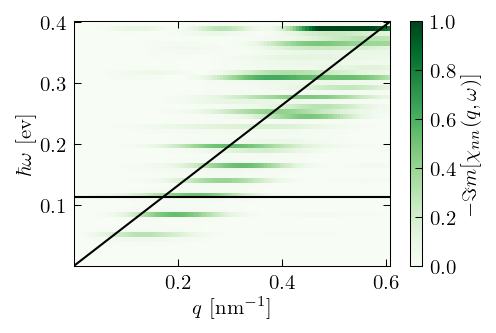

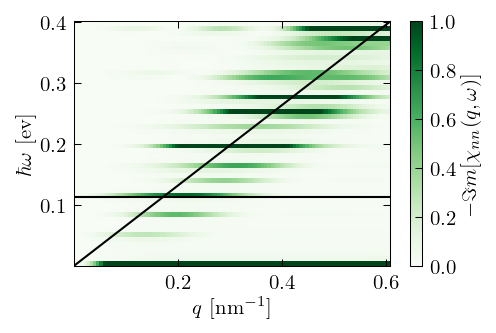

In [8]:
plt.imshow(
    -np.imag(chi).T,
    vmin=0,
    vmax=1,
    cmap="Greens",
    origin="lower",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.el * np.ones_like(q), "k")
# plt.plot(q, gr.hv*(q-2*gr.kf),'k')
# plt.plot(q, gr.hv*(q+2*gr.kf),'k')
# plt.plot(q, 2*gr.ef-gr.hv*q,'k')
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$-\Im m[\chi_{nn}(q,\omega)]$")
plt.figure()
plt.imshow(
    -np.imag(chi2).T,
    vmin=0,
    vmax=1,
    cmap="Greens",
    origin="lower",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.el * np.ones_like(q), "k")
# plt.plot(q, gr.hv*(q-2*gr.kf),'k')
# plt.plot(q, gr.hv*(q+2*gr.kf),'k')
# plt.plot(q, 2*gr.ef-gr.hv*q,'k')
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$-\Im m[\chi_{nn}(q,\omega)]$")

In [9]:
chi.shape

(100, 50)

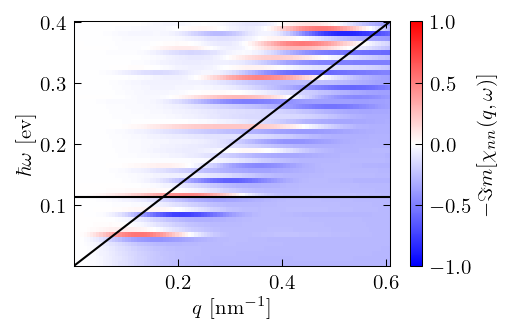

In [10]:
plt.imshow(
    np.real(chi).T,
    vmin=-1,
    vmax=1,
    cmap="bwr",
    origin="lower",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.el * np.ones_like(q), "k")
# plt.plot(q, gr.hv*(q-2*gr.kf),'k')
# plt.plot(q, gr.hv*(q+2*gr.kf),'k')
# plt.plot(q, 2*gr.ef-gr.hv*q,'k')
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$-\Im m[\chi_{nn}(q,\omega)]$")

(0.0, 1.0)

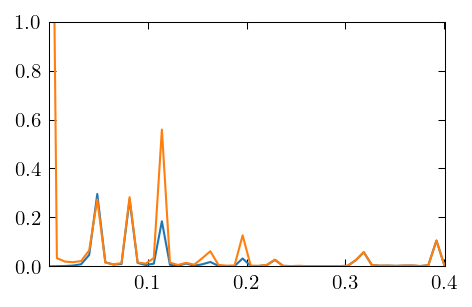

In [11]:
index = 20
plt.plot(omega, -chi[index, :].imag)
plt.plot(omega, -chi2[index, :].imag)
plt.ylim(0, 1)

In [12]:
sL = gr.nonlocal_conductivity_L(q=q, omega=omega)

In [13]:
sL.shape

(100, 50)

In [14]:
np.allclose(sL, sigma_xx)

True